# 〇〇
## このNotebookのねらい
- 〇〇

## このNotebookで重要じゃないこと
- 〇〇

In [1]:
# 必要なモジュールのimport
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

warnings.filterwarnings('ignore')

%matplotlib inline

# データの準備と問題の確認
## 解くべき問題は何か？
- 〇〇

## 現状の予測手法はあるか？
- 〇〇
    
## どういう問題として処理するか？
- 教師あり学習
- どんなデータがあるのか？

In [2]:
# データのロード
data_train = pd.read_csv('input/titanic/train.csv')

In [3]:
# 先頭5行の表示
# データの読み込みに失敗してないか？ ぱっと見で予想外なことはないか？
data_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

# データを眺める

## よくある基礎分析

In [4]:
# データの基本情報を確認する
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
# カラムごとの欠損の量を見る場合はこの書き方をよく使う
# .info() は 「Nullでないデータは◯◯個」なので、こちらの方がわかりやすい
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# 数値データの統計量を確認する
data_train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [7]:
# 文字列データの基本統計量を確認する
data_train.describe(include=['object'])

Name   Sex    Ticket    Cabin Embarked
count                         891   891       891      204      889
unique                        891     2       681      147        3
top     Fahlstrom, Mr. Arne Jonas  male  CA. 2343  B96 B98        S
freq                            1   577         7        4      644

## カラムごとにデータをみる
- カラムの意味は？
- どういう仮説がある？
- いろいろ可視化してみよう

### PassengerId
- 乗船客のID

In [8]:
data_train['PassengerId'].nunique()

891

### Survived
- 乗船客が生存したかどうか
    - 0: 死亡
    - 1: 生存

In [9]:
data_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [10]:
data_train['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

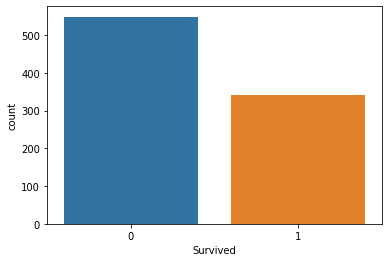

In [11]:
# グラフで確認するとわかりやすい
sns.countplot(data_train['Survived'])

### Pclass


In [12]:
data_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

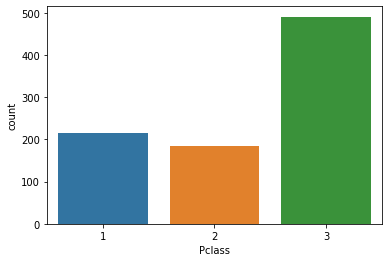

In [13]:
sns.countplot(data_train['Pclass'])

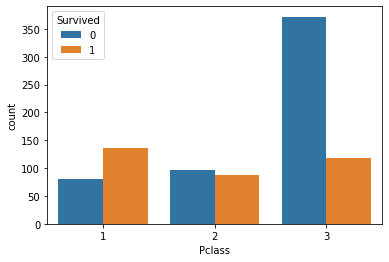

In [14]:
sns.countplot(data_train['Pclass'],
              hue=data_train['Survived'])

### Embarked
- 乗船客がどの港から乗船したか
    - 'S': Southampton
    - 'C': Cherbourg
    - 'Q': Queenstown

In [15]:
data_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

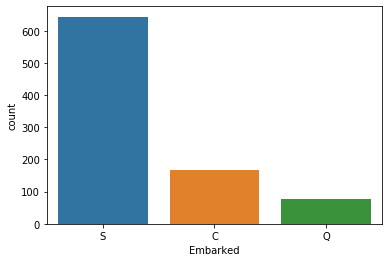

In [16]:
sns.countplot(data_train['Embarked'])

### Name


In [17]:
print('Excercise')

Excercise


### Sex

In [18]:
print('Excercise')

Excercise


### Age

In [19]:
print('Excercise')

Excercise


### SibSp


In [20]:
print('Excercise')

Excercise


### Parch


In [21]:
print('Excercise')

Excercise


### Ticket


In [22]:
print('Excercise')

Excercise


### Fare


In [23]:
print('Excercise')

Excercise


### Cabin


In [24]:
print('Excercise')

Excercise


# 演習
- Embarkedの分布をSurvivedでグループ分けしてみよう(層別解析)
- 他のカラムの意味を調べよう
- 他のカラムでの基礎分析をしてみよう
- データの分割比率を変えてみよう
- カテゴリ型のデータを特徴量に加えてみよう
- 数値型のデータを特徴量に加えてみよう
- 乱数のシードを変えてみよう
- 正答率(Accuracy)以外の評価指標を調べてみよう
- test.csvでの予測をしてみよう

# まとめ
〇〇